# Bharat Intern Task-1
 
# Data Science

# Task :-Stock Prediction using LSTM Model

# Name :-Kuraku Manasa

# Importing Modules

In [2]:
pip install numpy pandas keras tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Reading the Dataset

In [3]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-30,224.509995,229.456665,218.863327,224.473328,224.473328,94600500
1,2022-07-01,227.000000,230.229996,222.119995,227.263336,227.263336,74460300
2,2022-07-05,223.000000,233.146667,216.166672,233.066666,233.066666,84581100
3,2022-07-06,230.779999,234.563339,227.186661,231.733337,231.733337,71853600
4,2022-07-07,233.919998,245.363327,232.210007,244.543335,244.543335,81930600


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-06-23,259.290009,262.450012,252.800003,256.600006,256.600006,176584100
247,2023-06-26,250.070007,258.369995,240.699997,241.050003,241.050003,179990600
248,2023-06-27,243.240005,250.389999,240.850006,250.210007,250.210007,164968200
249,2023-06-28,249.699997,259.880005,248.889999,256.239990,256.239990,159770800
250,2023-06-29,258.029999,260.739990,253.610001,257.500000,257.500000,130834000


# Displaying the basic statistics about Data

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,210.994475,215.830305,205.951447,211.067384,211.067384,1.225008e+08
std,51.700800,52.411087,51.026823,51.703986,51.703986,4.999643e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,8.141040e+07
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.163124e+08
75%,249.885002,256.330002,242.751670,250.020004,250.020004,1.591312e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


# Sorting the Data

Checking for null values

In [8]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Close,0.0
5,Adj Close,0.0
6,Volume,0.0


In [9]:
srt = df.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-30,224.509995,229.456665,218.863327,224.473328,224.473328,94600500
1,2022-07-01,227.000000,230.229996,222.119995,227.263336,227.263336,74460300
2,2022-07-05,223.000000,233.146667,216.166672,233.066666,233.066666,84581100
3,2022-07-06,230.779999,234.563339,227.186661,231.733337,231.733337,71853600
4,2022-07-07,233.919998,245.363327,232.210007,244.543335,244.543335,81930600


In [10]:
srt.reset_index(inplace=True)

In [11]:
srt.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2022-06-30,224.509995,229.456665,218.863327,224.473328,224.473328,94600500
1,1,2022-07-01,227.000000,230.229996,222.119995,227.263336,227.263336,74460300
2,2,2022-07-05,223.000000,233.146667,216.166672,233.066666,233.066666,84581100
3,3,2022-07-06,230.779999,234.563339,227.186661,231.733337,231.733337,71853600
4,4,2022-07-07,233.919998,245.363327,232.210007,244.543335,244.543335,81930600


# Data Visualization

Plotting the graph for the Data and Close

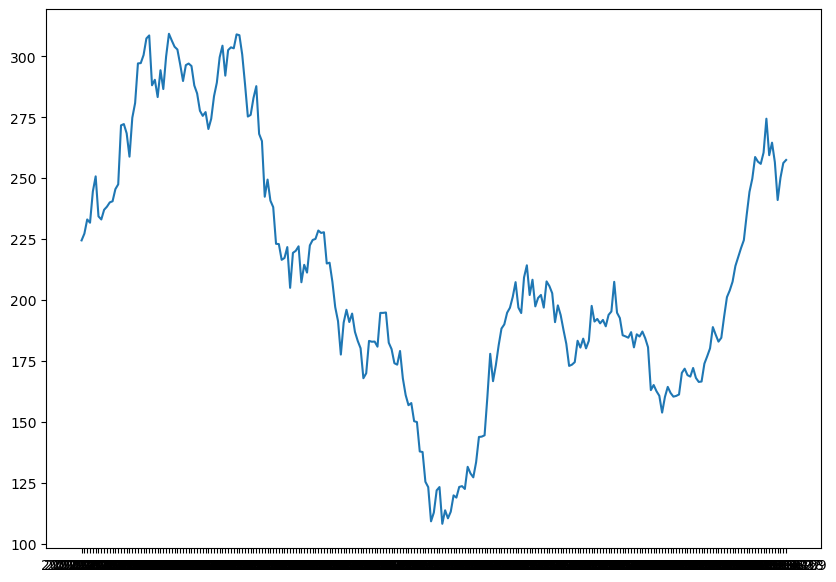

In [12]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'], srt['Close'])

In [13]:
close_srt = srt['Close']
close_srt

0      224.473328
1      227.263336
2      233.066666
3      231.733337
4      244.543335
          ...    
246    256.600006
247    241.050003
248    250.210007
249    256.239990
250    257.500000
Name: Close, Length: 251, dtype: float64

# Feature Scaling(MinMax Scaler)

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.57833876],
       [0.59220422],
       [0.62104494],
       [0.61441871],
       [0.67808036],
       [0.70899181],
       [0.6273896 ],
       [0.62106154],
       [0.64079112],
       [0.64711925],
       [0.65583273],
       [0.65821815],
       [0.68298377],
       [0.69277406],
       [0.81307355],
       [0.81574069],
       [0.79680605],
       [0.7492296 ],
       [0.82854588],
       [0.8587615 ],
       [0.93951887],
       [0.94014842],
       [0.95659807],
       [0.99044161],
       [0.99658744],
       [0.8948912 ],
       [0.90608952],
       [0.87085448],
       [0.92563688],
       [0.88723784],
       [0.95383159],
       [1.        ],
       [0.98630015],
       [0.97354471],
       [0.96794547],
       [0.93711684],
       [0.90355493],
       [0.93605672],
       [0.93925392],
       [0.93415168],
       [0.89449354],
       [0.87824272],
       [0.84285859],
       [0.83247182],
       [0.84017493],
       [0.80563555],
       [0.82655803],
       [0.872

# Splitting the Dataset

In [15]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data, test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [16]:
train_data.shape

(175, 1)

In [17]:
test_data.shape

(76, 1)

# Converting an array of values into a dataset matrix

In [18]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

# Reshaping of Dataset

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(74, 100)
(74,)


(None, None)

In [21]:
test_data.shape

(76, 1)

In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], test_data.shape[1], 1)

In [23]:
X_train

array([[[0.57833876],
        [0.59220422],
        [0.62104494],
        ...,
        [0.39171055],
        [0.37307423],
        [0.35826459]],

       [[0.59220422],
        [0.62104494],
        [0.61441871],
        ...,
        [0.37307423],
        [0.35826459],
        [0.29703804]],

       [[0.62104494],
        [0.61441871],
        [0.67808036],
        ...,
        [0.35826459],
        [0.29703804],
        [0.30717624]],

       ...,

       [[0.53871383],
        [0.54239142],
        [0.56465559],
        ...,
        [0.41148987],
        [0.445731  ],
        [0.42595168]],

       [[0.54239142],
        [0.56465559],
        [0.48151279],
        ...,
        [0.445731  ],
        [0.42595168],
        [0.39563664]],

       [[0.56465559],
        [0.48151279],
        [0.55287746],
        ...,
        [0.42595168],
        [0.39563664],
        [0.36725971]]])

In [24]:
X_test

array([], shape=(0, 1, 1), dtype=float64)

# Creating LSTM Model

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Prediction and Checking Performance

In [27]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
2/2 [==============================] - 12s 2s/step - loss: 0.1080 - val_loss: 0.0943
Epoch 2/60
2/2 [==============================] - 0s 206ms/step - loss: 0.0574 - val_loss: 0.0238
Epoch 3/60
2/2 [==============================] - 1s 222ms/step - loss: 0.0294 - val_loss: 0.0046
Epoch 4/60
2/2 [==============================] - 0s 222ms/step - loss: 0.0270 - val_loss: 0.0067
Epoch 5/60
2/2 [==============================] - 0s 233ms/step - loss: 0.0237 - val_loss: 0.0096
Epoch 6/60
2/2 [==============================] - 0s 205ms/step - loss: 0.0223 - val_loss: 0.0065
Epoch 7/60
2/2 [==============================] - 0s 208ms/step - loss: 0.0208 - val_loss: 0.0038
Epoch 8/60
2/2 [==============================] - 0s 203ms/step - loss: 0.0197 - val_loss: 0.0032
Epoch 9/60
2/2 [==============================] - 0s 193ms/step - loss: 0.0186 - val_loss: 0.0032
Epoch 10/60
2/2 [==============================] - 0s 189ms/step - loss: 0.0174 - val_loss: 0.0032
Epoch 11/60
2/2 [====

In [28]:
X_test=X_train

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 [==============================] - 0s 39ms/step


# Calculating the Performance

In [33]:
import math
from sklearn.metrics import mean_squared_error

In [34]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.06997426350013852

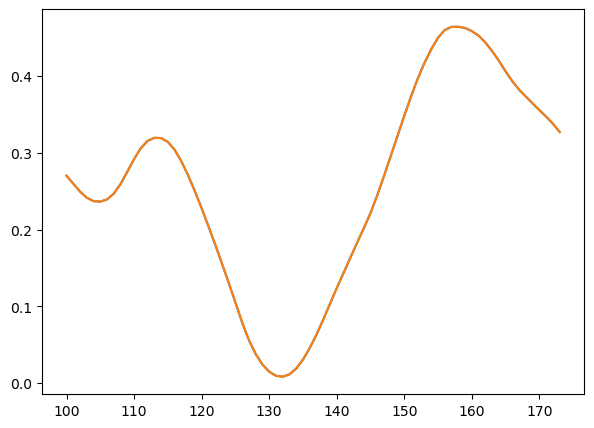

In [35]:
look_back = 100

trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(train_predict)+look_back, :] = test_predict

plt.figure(figsize=(7,5))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()